In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
from game import Environment
from dqn import DQN, ReplayMemory
from agent import Agent

pygame 2.6.1 (SDL 2.28.4, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
BATCH_SIZE = 256
GAMMA = 0.999
TAU = 0.002
LR = 0.00005
EPS_DECAY = 0.9995

In [3]:
env = Environment()
state = env.reset()
n_observations = len(state)
n_actions = 2

agent = Agent(n_observations, n_actions, batch_size=BATCH_SIZE, epsilon_decay=EPS_DECAY, gamma=GAMMA, tau=TAU, lr=LR)

In [6]:
num_episodes = 10000
rewards = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done:
        action = agent.nextAction(state)
        next_state, reward, done = env.step(action)
        
        agent.storeTransition(state, action, reward, next_state, done)

        state = next_state
        total_reward += reward

        agent.replay()
        agent.updateTargetNetwork()
        steps += 1

        if steps > 5000:
            break

    agent.decayEpsilon()
    rewards.append(total_reward)

    if episode % 500 == 0:
        print(f"Episode {episode}, Steps: {steps}, Ave Reward: {sum(rewards)/len(rewards)}, Epsilon: {agent.epsilon:.2f}")
        torch.save(agent.target_net.state_dict(), "model4.pth")
        rewards = []

torch.save(agent.target_net.state_dict(), "model4.pth")
print("Model saved as model4.pth")

Episode 0, Steps: 624, Ave Reward: 523.0, Epsilon: 0.01
Episode 500, Steps: 267, Ave Reward: 554.082, Epsilon: 0.01
Episode 1000, Steps: 427, Ave Reward: 557.606, Epsilon: 0.01
Episode 1500, Steps: 79, Ave Reward: 395.8, Epsilon: 0.01
Episode 2000, Steps: 405, Ave Reward: 213.904, Epsilon: 0.01
Episode 2500, Steps: 66, Ave Reward: 61.218, Epsilon: 0.01
Episode 3000, Steps: 75, Ave Reward: -5.24, Epsilon: 0.01
Episode 3500, Steps: 267, Ave Reward: 162.444, Epsilon: 0.01
Episode 4000, Steps: 66, Ave Reward: 183.1, Epsilon: 0.01
Episode 4500, Steps: 267, Ave Reward: 181.422, Epsilon: 0.01
Episode 5000, Steps: 36, Ave Reward: 146.178, Epsilon: 0.01
Episode 5500, Steps: 33, Ave Reward: 380.742, Epsilon: 0.01
Episode 6000, Steps: 66, Ave Reward: 344.362, Epsilon: 0.01
Episode 6500, Steps: 337, Ave Reward: 194.24, Epsilon: 0.01
Episode 7000, Steps: 41, Ave Reward: 61.864, Epsilon: 0.01
Episode 7500, Steps: 334, Ave Reward: 16.07, Epsilon: 0.01


KeyboardInterrupt: 

In [9]:
torch.save(agent.target_net.state_dict(), "model2.pth")
print("Model saved as model2.pth")

Model saved as model2.pth


In [ ]:
model = DQN(n_observations, n_actions)
model.load_state_dict(torch.load("model2.pth"))

test_env = Environment(renderGame=True)
state = test_env.reset()
steps = 0

done = False

while not done:
    steps += 1
    action = model.action(state)
    next_state, reward, done = test_env.step(action)
    state = next_state

    if not done:
        test_env.render()

    if steps > 5000:
        break
print(f"Steps taken: {steps}")

test_env.quit()

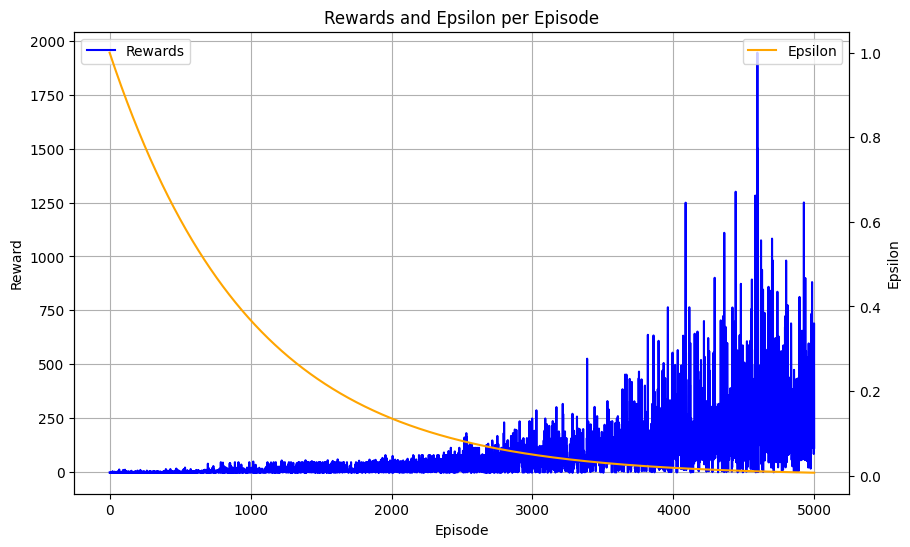

In [ ]:
import matplotlib.pyplot as plt

# Calculate epsilon values for each episode
epsilon_values = [max(1 * (EPS_DECAY ** episode), 0.1) for episode in range(num_episodes)]

plt.figure(figsize=(10, 6))

# Plot rewards
plt.plot(range(num_episodes), rewards, label="Rewards", color="blue")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Rewards and Epsilon per Episode")
plt.legend(loc="upper left")
plt.grid()

# Add epsilon to the graph with a secondary y-axis
ax2 = plt.gca().twinx()
ax2.plot(range(num_episodes), epsilon_values, label="Epsilon", color="orange")
ax2.set_ylabel("Epsilon")
ax2.legend(loc="upper right")

plt.show()